A base de dados estudada neste documento foi retirada do Kaggle, no desafio [`Titanic: Machine Learning from Disaster`](https://www.kaggle.com/c/titanic).
O objetivo deste documento é desenvolver um modelo para predizer quais pessoas sobreviveram ao desastre conforme características de cada indivíduo.

#### Descrição das Variáveis
- `PassengerId`: Id do Passageiro;
- `Survived`: Variável binária que indica se o passageiro sobreviveu (1 = Sim e 0 = Não);
- `Pclass`: Classe do ticket do passageiro (1 = 1st, 2 = 2nd, 3 = 3rd). Essa variável é uma aproximação para o status socio-economico do passageiro;
- `Name`: Nome do Passageiro;
- `Sex`: Sexo do Passageiro;
- `Age`: Idade do Passageiro;
- `SibSp`: Quantidade de irmãos e/ou cônjuges a bordo do titanic;
- `Parch`: Quantidade de pais e/ou filhos a bordo do titanic;
- `Ticket`: Número do Ticket;
- `Fare`: Tarifa paga pelo passageiro;
- `Cabin`: Número da Cabine;
- `Embarked`: Porto no qual o passageiro embarcou (C = Cherbourg, Q = Queenstown, S = Southampton).

### Configuração do Notebook

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

### Leitura da Base

In [47]:
df_train = pd.read_csv("train.csv")

In [49]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
print ("Número de registros:", df_train['Survived'].count())
print ("Número de features:", len(df_train.columns))

Número de registros: 891
Número de features: 12


### Higienização da Base

In [51]:
#Retirada de variaveis que nao serão uteis para o estudo
df_train = df_train.drop(["PassengerId", 'Name', 'Ticket', 'Cabin'], axis=1)

In [52]:
#Retirada de valores nulos
df_train = df_train.dropna()
df_train.count()

Survived    712
Pclass      712
Sex         712
Age         712
SibSp       712
Parch       712
Fare        712
Embarked    712
dtype: int64

In [97]:
sex_transf = []
for x in df_train['Sex']:
  if x == 'male': 
    sex_transf = sex_transf+1 
  else: sex_transf = sex_transf+2

TypeError: can only concatenate list (not "int") to list

In [107]:
df_train.loc[df_train['Sex'] == 1]['Sex'].view()

TypeError: Cannot change data-type for object array.

## Análise de Variáveis

### Survived

In [84]:
df_train['Survived'].describe()

count    712.000000
mean       0.404494
std        0.491139
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

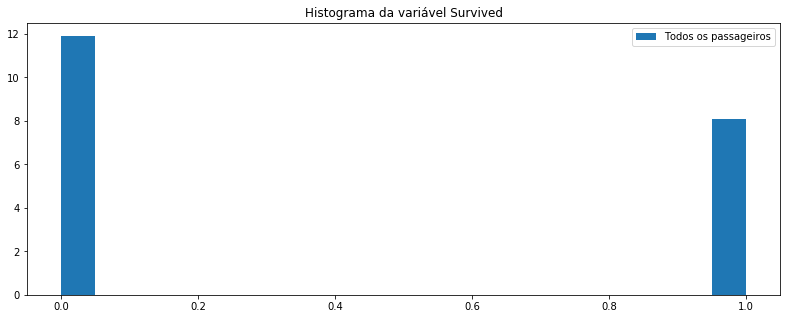

In [86]:
#cria subplot
_, axes = plt.subplots(1, 1, figsize=(13.5, 5))
#axes = axes.flatten()

#produz o plot
nbins = np.histogram(df_train['Survived'], bins=20)[1]
axes.hist(df_train['Survived'], bins=nbins, density=True, label='Todos os passageiros')
axes.set_title('Histograma da variável Survived')
axes.legend()

#exibe o plot
plt.show()

### Pclass

In [66]:
df_train['Pclass'].describe()

count    712.000000
mean       2.240169
std        0.836854
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

#### Univariada

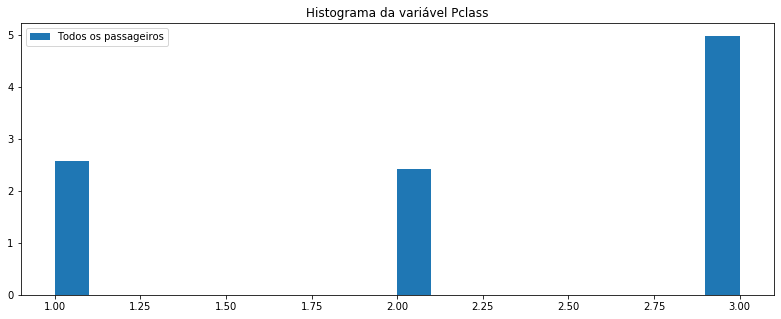

In [63]:
#cria subplot
_, axes = plt.subplots(1, 1, figsize=(13.5, 5))
#axes = axes.flatten()

#produz o plot
nbins = np.histogram(df_train['Pclass'], bins=20)[1]
axes.hist(df_train['Pclass'], bins=nbins, density=True, label='Todos os passageiros')
axes.set_title('Histograma da variável Pclass')
axes.legend()

#exibe o plot
plt.show()

#### Bivariada

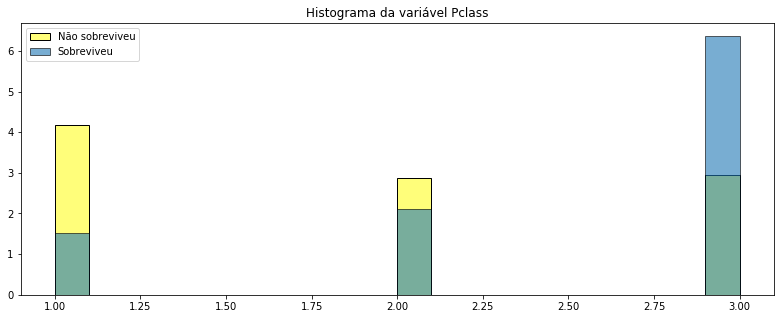

In [83]:
#cria subplot
_, axes = plt.subplots(1, 1, figsize=(13.5, 5))
#axes = axes.flatten()

#produz o plot
nbins = np.histogram(df_train['Pclass'], bins=20)[1]
axes.hist(df_train.loc[df_train['Survived'] == 1]['Pclass'], bins=nbins, density=True, label='Não sobreviveu', color='#fffe7a', 
          edgecolor='k', alpha=1)
axes.hist(df_train.loc[df_train['Survived'] == 0]['Pclass'], bins=nbins, density=True, label='Sobreviveu', 
          edgecolor='k', alpha=0.6)
axes.set_title('Histograma da variável Pclass')
axes.legend()

#exibe o plot
plt.show()

### Sex

In [88]:
df_train['Sex'].describe()

count      712
unique       2
top       male
freq       453
Name: Sex, dtype: object

#### Univariada

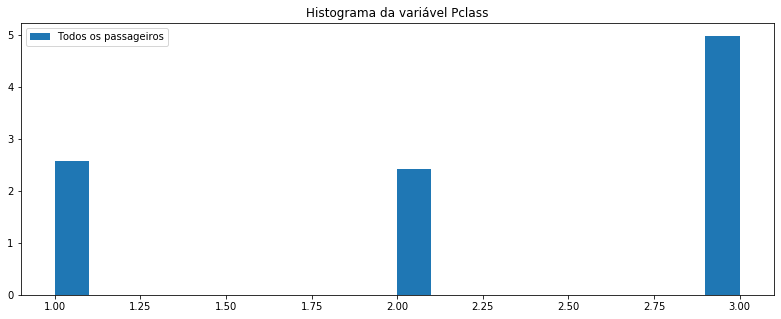

In [63]:
#cria subplot
_, axes = plt.subplots(1, 1, figsize=(13.5, 5))
#axes = axes.flatten()

#produz o plot
nbins = np.histogram(df_train['Pclass'], bins=20)[1]
axes.hist(df_train['Pclass'], bins=nbins, density=True, label='Todos os passageiros')
axes.set_title('Histograma da variável Pclass')
axes.legend()

#exibe o plot
plt.show()

#### Bivariada

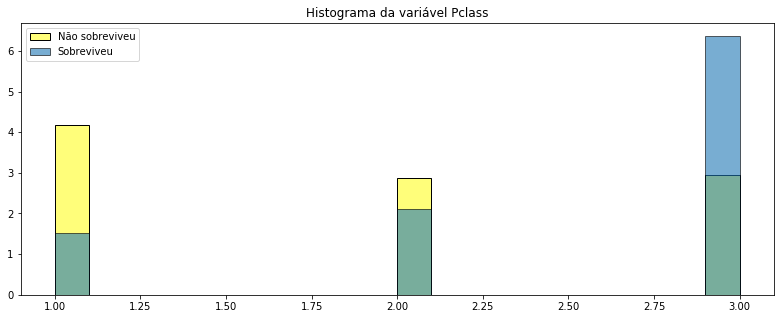

In [83]:
#cria subplot
_, axes = plt.subplots(1, 1, figsize=(13.5, 5))
#axes = axes.flatten()

#produz o plot
nbins = np.histogram(df_train['Pclass'], bins=20)[1]
axes.hist(df_train.loc[df_train['Survived'] == 1]['Pclass'], bins=nbins, density=True, label='Não sobreviveu', color='#fffe7a', 
          edgecolor='k', alpha=1)
axes.hist(df_train.loc[df_train['Survived'] == 0]['Pclass'], bins=nbins, density=True, label='Sobreviveu', 
          edgecolor='k', alpha=0.6)
axes.set_title('Histograma da variável Pclass')
axes.legend()

#exibe o plot
plt.show()

In [87]:
df_train.count()

Survived    712
Pclass      712
Sex         712
Age         712
SibSp       712
Parch       712
Fare        712
Embarked    712
dtype: int64